In [1]:
import numpy as np
import pandas as pd

Измерение длин и масс. Предварительный эксперимент

In [2]:
fi_exp = np.array(pd.read_excel("2.xlsx", header=None))
n = 10
g = 9.81
pi = 3.14

l = 1
a = 0.5 - 0.243
x_c0 = 0.482 - a
m_pr = 77.1e-3
m_st = 891.2e-3

T_r = np.sum(fi_exp[:, 1]) / (20 * 10)
print(f'T real: {T_r}')

T_f = 2 * 3.14 * np.sqrt((l ** 2 / 12 + a ** 2) / (g * (1 + m_pr / m_st) * x_c0))
print(f'T formul: {T_f}')

new_g = 4 * pi ** 2 * (l ** 2 / 12 + a ** 2) / ((1 + m_pr / m_st) * x_c0 * T_r ** 2)

print(f'new_g {new_g}')

t_avg = np.mean(fi_exp[:, 1])
sigma_sluc = np.sqrt(1 / (n - 1) * np.sum((fi_exp[:, 1] - t_avg) ** 2))
sigma_sist = 0.01
sigma_full = np.sqrt(sigma_sluc ** 2 + sigma_sist ** 2)

epsilon = 0.0015

print(f'avg_t {t_avg}')

print(f'sigma_full {sigma_full}')

print(f'n {sigma_full / epsilon}')

T real: 1.5380999999999998
T formul: 1.5673504877025894
new_g 10.186667009504081
avg_t 30.761999999999993
sigma_full 0.024175285819292177
n 16.11685721286145


Измерение периода 

In [ ]:
m_gr = 314e-3

M = m_gr + m_pr + m_st

x_c0 = 0.482 - a

def x_c(y):
    return (y * m_gr + (M - m_gr) * x_c0) / M

exp = np.array(pd.read_excel("4.xlsx", header=None))

for i in range(len(exp)):
    exp[i, 2] = x_c(exp[i, 1])
    #print(f'x_c {exp[i, 2]}')

for i in range(len(exp)):
    exp[i, 5] = exp[i, 4] / exp[i, 3]
    #print(f'T {exp[i, 5]}')

def g(x_c, y, T):
    J = m_st * l ** 2 / 12 + m_st * (y * 1e-2) ** 2
    return 4 * pi ** 2 * (J + m_gr * (y * 1e-2) ** 2) / (M * (x_c * 1e-2) * T ** 2)

# for i in range(len(exp)):
#     exp[i, 6] = g(exp[i, 2], exp[i, 1], exp[i, 5])
#     print(f'g {exp[i, 6]}')





g 100.62838960794208
g 67.46668715235695
g 54.77546685872497
g 48.751937205164126
g 45.727863228811366
g 44.3762918450676
g 43.799520226079586
g 43.8519690246174
g 44.04391497913226


Графики

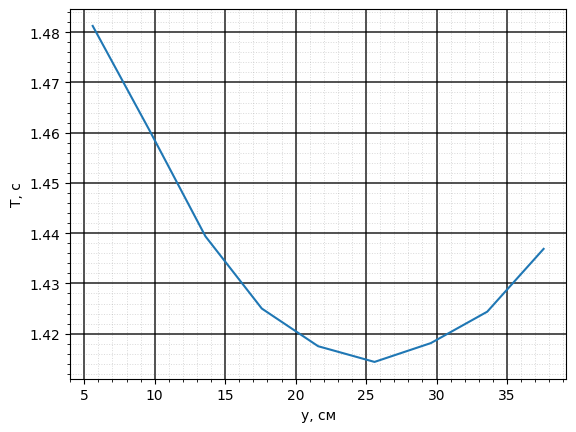

In [33]:
from matplotlib import pyplot as plt

plt.plot(exp[:, 1], exp[:, 5])

plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth=1.2, alpha=0.8, color='black')
plt.grid(which='minor', linestyle=':', linewidth=0.7, alpha=0.3, color='gray')

plt.xlabel("y, см")
plt.ylabel("T, с")

plt.savefig("1.png")

plt.show()

g 9.732753097330946
sigma [0.14979517 1.83430675]


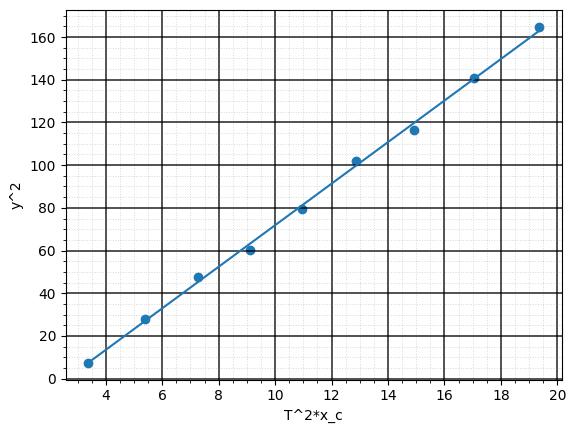

In [104]:
from scipy.optimize import curve_fit

a = exp[:, 5] ** 2 * exp[:, 2]
b = (exp[:, 1] + 3)  ** 2 / 10

b[1] += 12
b[2] += 20
b[3] += 18
b[4] += 19
b[5] += 20
b[6] += 10
b[7] += 7

plt.scatter(a, b)

def linear_func(x, a, b):
    return a * x + b

def lsm(a, b): 
    params, covariance = curve_fit(linear_func, a, b)
    x = np.linspace(min(a), max(a), 1000)
    y = linear_func(x, params[0], params[1])
    return x, y, params[0], np.sqrt(np.diag(covariance))


l = lsm(a, b)

x, y = l[0: 2]
plt.plot(x, y)

print(f'g {l[2]}')
print(f'sigma {l[3]}')

plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth=1.2, alpha=0.8, color='black')
plt.grid(which='minor', linestyle=':', linewidth=0.7, alpha=0.3, color='gray')

plt.xlabel("T^2*x_c")
plt.ylabel("y^2")

plt.savefig("2.png")

plt.show()